# 다중 서브플롯

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
plt.style.use('seaborn-white')

## plt.axes : 직접 만든 서브플롯

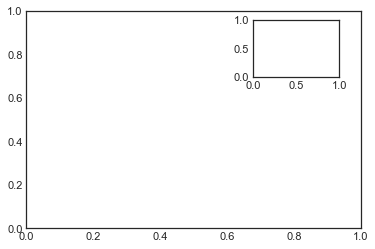

In [2]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

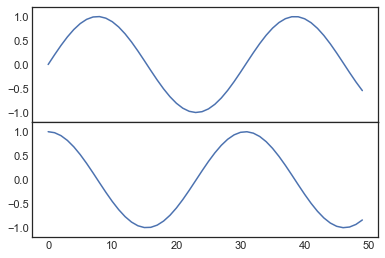

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels = [], ylim = (-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim = (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

## plt.subplot : 간단한 서브플롯의 그리드

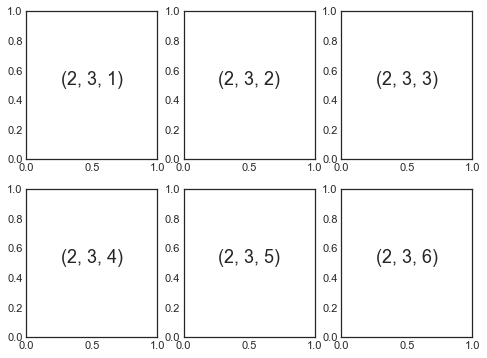

In [4]:
plt.figure(figsize = (8, 6))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center')

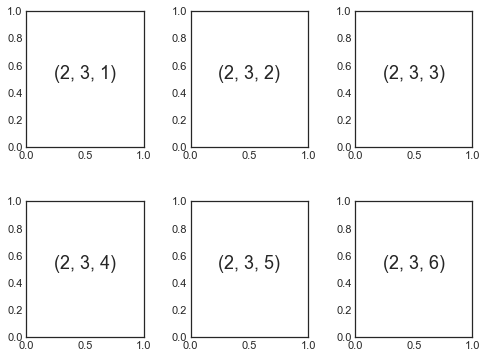

In [5]:
fig = plt.figure(figsize = (8, 6))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize = 18, ha = 'center')

## plt.subplots : 한 번에 전체 그리드 만들기

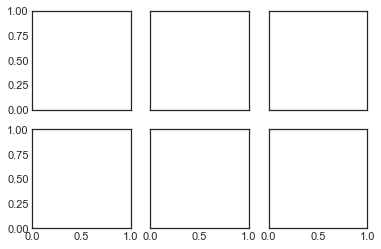

In [6]:
fig, ax = plt.subplots(2, 3, sharex = 'col', sharey = 'row')

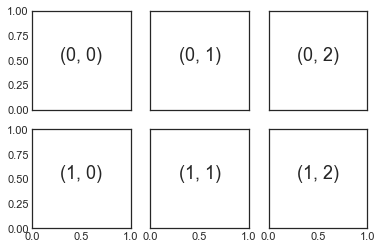

In [7]:
# 축이 2차원 배열 안에 있어 [행, 열]로 인덱싱할 수 있음
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize = 18, ha = 'center')

fig

## plt.GridSpec : 복잡한 배치

In [8]:
grid = plt.GridSpec(2, 3, wspace = 0.4, hspace = 0.3)

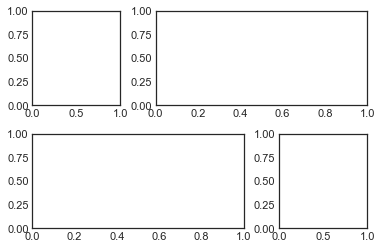

In [9]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

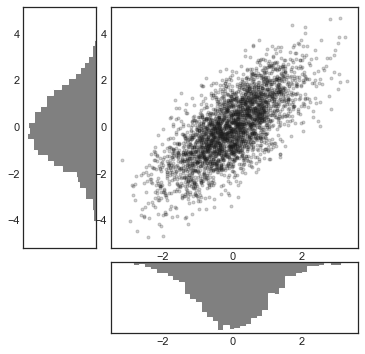

In [10]:
# 정규 분포 데이터 만들기
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# gridspec으로 축 설정하기
fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex = main_ax)

# 메인 축에 점 산포하기
main_ax.plot(x, y, 'ok', markersize = 3, alpha = 0.2)

# 보조 축상에 히스토그램 만들기
x_hist.hist(x, 40, histtype = 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'gray')
y_hist.invert_xaxis()